# Momentum using Nasdaq stocks

Using the Nasdaq as there are only 100 stocks so better for plotting purposes.

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [5]:
# Start by getting a list of the tickers in the Nasdaq. Wikipedia has a nice little table.
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
data_table = pd.read_html(nasdaq)
len(data_table) # Pandas found 17 datatables within the webpage. We want to figure out which one contains the tickers.

17

In [6]:
data_table[4] # Here it is!

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


In [7]:
tickers = data_table[4]['Ticker'].tolist() #Convert the column into a list to generate a list of tickers
tickers

['ADBE',
 'ADP',
 'ABNB',
 'ALGN',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CHTR',
 'CTAS',
 'CSCO',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'EBAY',
 'EA',
 'ENPH',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'JD',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LCID',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SGEN',
 'SIRI',
 'SBUX',
 'SNPS',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBA',
 'WBD',
 'WDAY',
 'XEL',
 'ZM',
 'ZS']

In [8]:
# Feed those tickers into a yfinance download over the past 2 years. We want at least two years of data so we can do a 1 year lookback period for momentum.
# Lets say the training set goes up to 2023-06-30
training_period = ('2018-06-01', '2021-06-30')
nasdaq_download = yf.download(tickers, start = training_period[0], end = training_period[1])['Adj Close'] 

[*********************100%%**********************]  101 of 101 completed


3 Failed downloads:
['GFS', 'GEHC', 'CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1527825600, endDate = 1625025600")


In [9]:
nasdaq_prices = nasdaq_download
nasdaq_prices

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,45.390621,NaN,251.309998,88.580887,119.027756,133.520004,55.741821,333.089996,48.945549,14.400000,...,8.664000,99.437714,104.124748,152.050003,50.710762,20.950001,126.290001,38.552906,NaN,28.180000
2018-06-04,45.769993,NaN,253.339996,90.003242,120.390862,135.570007,55.215157,343.200012,48.992393,14.850000,...,8.320000,100.251915,104.852760,149.649994,51.065727,21.090000,128.149994,38.035889,NaN,29.209999
2018-06-05,46.123119,NaN,252.699997,90.597366,120.229462,136.800003,54.579826,346.079987,49.573292,14.850000,...,8.793000,101.914993,105.823448,145.720001,50.734966,21.740000,128.710007,37.329281,NaN,30.129999
2018-06-06,46.282970,NaN,253.949997,91.911682,122.049828,137.929993,53.342613,346.369995,49.217255,15.670000,...,8.627000,102.304756,106.211723,145.970001,50.944714,22.360001,128.309998,36.493416,NaN,30.650000
2018-06-07,46.158901,NaN,247.509995,92.219185,121.301750,134.139999,53.626835,339.320007,48.017975,14.890000,...,8.655000,101.551170,105.910797,145.750000,51.307735,22.770000,123.370003,36.812252,NaN,37.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.973160,151.580002,574.229980,157.063263,187.708664,283.670013,76.298157,605.820007,132.850143,83.820000,...,65.389999,175.024643,169.465393,187.520004,46.621601,29.510000,238.690002,62.532509,376.920013,218.860001
2021-06-24,131.686905,150.729996,578.260010,160.336380,188.525925,286.959991,76.482780,617.390015,135.556183,86.099998,...,75.879997,177.385239,171.054443,191.940002,46.639496,30.320000,241.710007,62.560825,373.399994,219.639999
2021-06-25,131.390762,149.669998,579.659973,160.931549,189.756622,288.739990,78.255226,614.979980,133.526657,85.620003,...,76.019997,176.971420,172.426346,194.339996,46.693207,30.860001,243.000000,63.353943,372.470001,218.839996


In [10]:
# Lets see if we had any null values
nasdaq_prices.loc[:, nasdaq_prices.isna().any()]

,ABNB,CEG,CRWD,DDOG,GEHC,GFS,LCID,MRNA,PDD,ZM
Date,,,,,,,,,,
2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-23,151.580002,NaN,252.899994,106.529999,NaN,NaN,25.059999,212.039993,121.610001,376.920013
2021-06-24,150.729996,NaN,253.699997,106.440002,NaN,NaN,24.850000,220.139999,127.720001,373.399994
2021-06-25,149.669998,NaN,253.240005,106.059998,NaN,NaN,25.180000,219.940002,127.599998,372.470001


In [11]:
# We find that a number of stocks have NA values at the start of the period. This is because they were not trading as at that time.
# we're just going to drop these for the purposes of our analysis.
nasdaq_prices.dropna(axis=1, inplace=True)

In [12]:
# Lets see if we had any null values now
nasdaq_prices.loc[:, nasdaq_prices.isna().any()]

""
Date
2018-06-01
2018-06-04
2018-06-05
2018-06-06
2018-06-07
...
2021-06-23
2021-06-24
2021-06-25


In [13]:
nasdaq_prices

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,45.390621,251.309998,88.580887,119.027756,133.520004,55.741821,333.089996,48.945549,14.400000,156.620605,...,19.454666,8.664000,99.437714,104.124748,152.050003,50.710762,20.950001,126.290001,38.552906,28.180000
2018-06-04,45.769993,253.339996,90.003242,120.390862,135.570007,55.215157,343.200012,48.992393,14.850000,158.216095,...,19.782667,8.320000,100.251915,104.852760,149.649994,51.065727,21.090000,128.149994,38.035889,29.209999
2018-06-05,46.123119,252.699997,90.597366,120.229462,136.800003,54.579826,346.079987,49.573292,14.850000,155.050705,...,19.408667,8.793000,101.914993,105.823448,145.720001,50.734966,21.740000,128.710007,37.329281,30.129999
2018-06-06,46.282970,253.949997,91.911682,122.049828,137.929993,53.342613,346.369995,49.217255,15.670000,156.603546,...,21.299999,8.627000,102.304756,106.211723,145.970001,50.944714,22.360001,128.309998,36.493416,30.650000
2018-06-07,46.158901,247.509995,92.219185,121.301750,134.139999,53.626835,339.320007,48.017975,14.890000,156.390244,...,21.072666,8.655000,101.551170,105.910797,145.750000,51.307735,22.770000,123.370003,36.812252,37.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,131.973160,574.229980,157.063263,187.708664,283.670013,76.298157,605.820007,132.850143,83.820000,221.818329,...,218.856674,65.389999,175.024643,169.465393,187.520004,46.621601,29.510000,238.690002,62.532509,218.860001
2021-06-24,131.686905,578.260010,160.336380,188.525925,286.959991,76.482780,617.390015,135.556183,86.099998,223.899811,...,226.606674,75.879997,177.385239,171.054443,191.940002,46.639496,30.320000,241.710007,62.560825,219.639999
2021-06-25,131.390762,579.659973,160.931549,189.756622,288.739990,78.255226,614.979980,133.526657,85.620003,225.507385,...,223.956665,76.019997,176.971420,172.426346,194.339996,46.693207,30.860001,243.000000,63.353943,218.839996


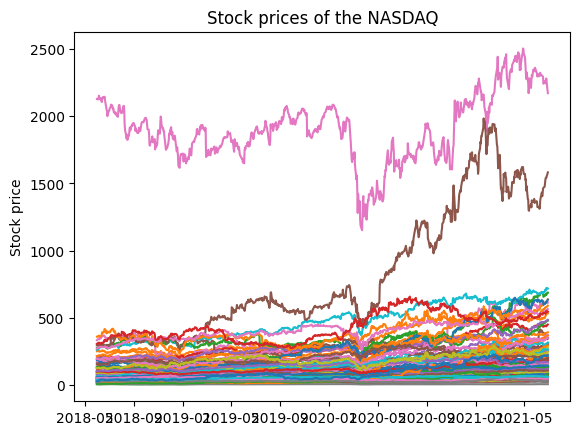

In [14]:
# All clear. Let's plot and see what we're working with.
fig, ax = plt.subplots()
ax.plot(nasdaq_prices);
ax.set_ylabel('Stock price')
ax.set_title('Stock prices of the NASDAQ');

### YoY Momentum Strategy

For our trading strategy, we want to figure out the 5 winners and losers.

In [15]:

def calculate_growth(stock_prices: pd.DataFrame, trading_days: int) -> pd.DataFrame:
    """
    Calculates the period over period (e.g., YoY or MoM) growth of each stock in a DataFrame of stock prices.

    Args:
    - stock_prices: DataFrame of stock prices with dates as index and tickers as columns.
    - trading_days: Number of trading days in a year. Default is 252.

    Returns:
    - DataFrame of YoY growth for each stock.
    """
    return stock_prices.pct_change(periods=trading_days)[trading_days:] # Calculates percent change from t and t-trading days

def get_highest_lowest(pct_change: pd.DataFrame, n: int) -> pd.DataFrame:
    """
    Returns the top n performing and bottom n performing tickers based on the percentage change in stock prices.

    Args:
    - pct_change: DataFrame of percentage change in stock prices.
    - n: Number of top and bottom performing tickers to return.

    Returns:
    - last_day_pct_change: DataFrame of percentage change in stock prices on the last day.
    - highest: DataFrame of top n performing tickers and their percentage change.
    - lowest: DataFrame of bottom n performing tickers and their percentage change.
    """

    last_day_pct_change = pct_change.iloc[-1].T # get last day pct_change
    last_day_pct_change = last_day_pct_change.to_frame().reset_index() # convert to DataFrame and reset index
    last_day_pct_change.columns = ['ticker', 'pct_change'] # rename columns

    highest = last_day_pct_change.nlargest(n, 'pct_change').reset_index(drop=True) # get n largest pct_change
    lowest = last_day_pct_change.nsmallest(n, 'pct_change').reset_index(drop=True) # get n smallest pct_change

    print('-'*20)
    print(f'Top {n} performing tickers and their returns:')
    for i in range(n):
        print(f"{highest['ticker'][i]}\t: {highest['pct_change'][i]:.2%}")
    print('-'*20)
    print(f'Bottom {n} performing tickers and their returns:')
    for i in range(n):
        print(f"{lowest['ticker'][i]}\t: {lowest['pct_change'][i]:.2%}")

    return highest, lowest

def plot_momentum(
        pct_change: pd.DataFrame, 
        highest: pd.DataFrame, 
        lowest: pd.DataFrame, 
        y_label: str,
        trading_days: int) -> None:
    """
    Plots the momentum of the top n performing and bottom n performing tickers based on the percentage change in stock prices.

    Args:
    - pct_change: DataFrame of percentage change in stock prices.
    - highest: DataFrame of top n performing tickers and their percentage change.
    - lowest: DataFrame of bottom n performing tickers and their percentage change.
    - y_label: Label for y-axis.
    - trading_days: Number of trading days in a year.

    Returns:
    - None
    """
    legend_lines = []
    legend_labels = []

    _, ax = plt.subplots()
    
    pct_change = pct_change[-trading_days:] # we only want to plot the last period's worth
    end_date = pct_change[-1:].index[0].strftime('%Y-%m-%d')
    for column in pct_change.columns:
        if column in highest['ticker'].to_list():
            line = ax.plot(pct_change[column], color ='green', linewidth=0.75, label=column)
            legend_lines.append(line[0])
            legend_labels.append(column)

    for column in pct_change.columns:    
        if column in lowest['ticker'].to_list():
            line = ax.plot(pct_change[column], color ='red', linewidth=0.75, label=column)
            legend_lines.append(line[0])
            legend_labels.append(column)

    for column in pct_change.columns:
        if column not in highest['ticker'].to_list() and column not in lowest['ticker'].to_list():
            ax.plot(pct_change[column], color ='grey', linewidth=0.25, alpha=0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    ax.axhline(y=0, color='black', linewidth=0.5) # add zero line
    ax.set_xlim(pct_change.index.min(), pct_change.index.max()) # set x-axis limits

    ticks = trading_days // 5

    ax.set_xticks(pct_change.index[::ticks]) # set x-axis tick frequency to every 5th tick

    ax.legend(legend_lines, legend_labels, loc='lower left', bbox_to_anchor=(1, 0.2))

    ax.set_ylabel(f'{y_label} Price Change to Date (%)')
    ax.set_xlabel('Date')
    ax.set_title(f'NASDAQ Highest and Lowest {y_label} returns as at {end_date}')

    plt.show()

YoY implementation

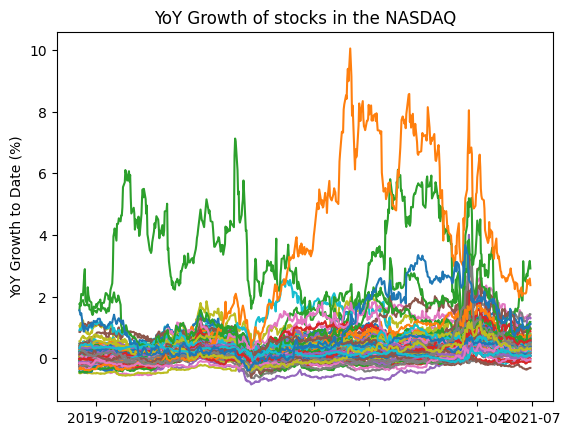

In [16]:
YoY_change = calculate_growth(nasdaq_prices, trading_days = 252)

_,ax = plt.subplots()
ax.plot(YoY_change)
ax.set_ylabel('YoY Growth to Date (%)') # Note here that 1.0 means 100% growth. We will fix up the axes in our final plot.
ax.set_title('YoY Growth of stocks in the NASDAQ');

In [17]:
highest_yoy, lowest_yoy = get_highest_lowest(YoY_change, 5)

--------------------
Top 5 performing tickers and their returns:
ENPH	: 291.38%
TSLA	: 237.23%
AMAT	: 142.69%
FANG	: 130.55%
ALGN	: 129.96%
--------------------
Bottom 5 performing tickers and their returns:
VRTX	: -31.00%
REGN	: -10.62%
GILD	: -4.85%
SGEN	: -3.52%
INTC	: -0.02%


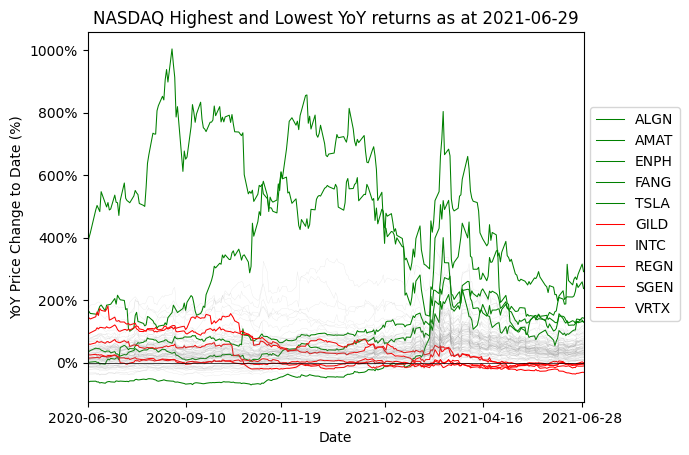

In [18]:
plot_momentum(
    pct_change = YoY_change, 
    highest=highest_yoy, 
    lowest=lowest_yoy,
    y_label = 'YoY',
    trading_days = 252)

We have completed the first step of figuring out what stocks to go long and short on. Our next step is to assume that we enter into our trades as at 30 June 2023. We will then hold these positions until present day and assess what our return is.

1. Figure out the number of shares to buy/sell for each stock.
2. Calculate the return of the portfolio every day.
3. Store these returns in a list or dataframe.
4. Plot the cumulative returns of the portfolio.

In [19]:
portfolio_value = 10**6
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
stocks = highest_yoy['ticker'].to_list()
benchmark = '^GSPC'

In [20]:
def calculate_portfolio_value(
    capital: int, 
    weights: list,
    portfolio_type: str, # 'long' or 'short'
    stocks: list,
    start_date: str,
    end_date = None) -> pd.DataFrame:
    """
    Calculates the portfolio value over time.

    Args:
    - capital: Initial capital to invest.
    - weights: List of weights for each stock in the portfolio.
    - portfolio_type: Type of portfolio, either 'long' or 'short'.
    - stocks: List of stock tickers to include in the portfolio.
    - start_date: Start date for the portfolio value calculation.
    - end_date: End date for the portfolio value calculation. Defaults to None.

    Returns:
    - portfolio_value: DataFrame of the portfolio value over time, including daily returns and cumulative returns.
    """    
    stock_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close'] # Download stock prices for the test period
    stock_prices = stock_data[stocks] # Reorder columns so its in the same order as the stocks list

    # Calculate number of shares at opening date
    shares_df = pd.DataFrame(index=[stock_prices.index[0]])

    for s,w in zip(stocks, weights):
        # shares_df[s] = np.floor((capital * np.array(w)) / stock_prices[s][0]) # if there are no fractional shares
        shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares

    print('On the start date, you have:')
    for i, stock in enumerate(stocks):
        print(f"{stocks[i]}:\t{shares_df[stock][0]:.2f} shares")
    
    portfolio_value = stock_prices.mul(shares_df.values, axis=1) # multiply each column by the corresponding share amount
    
    portfolio_value['total'] = portfolio_value.sum(axis=1)

    if portfolio_type == 'long':
        portfolio_value['pct_daily_returns'] = portfolio_value['total'].pct_change()
        portfolio_value['dollar_daily_returns'] = portfolio_value['total'].diff()
        portfolio_value['cum_returns'] = np.cumsum(portfolio_value['dollar_daily_returns'])
    else:
        portfolio_value['pct_daily_returns'] = -portfolio_value['total'].pct_change()
        portfolio_value['dollar_daily_returns'] = -portfolio_value['total'].diff()
        portfolio_value['cum_returns'] = np.cumsum(portfolio_value['dollar_daily_returns'])
    
    return portfolio_value

def calc_total_portfolio_returns(long_p: pd.DataFrame, short_p: pd.DataFrame):
    """
    Calculates the total portfolio returns over time.

    Args:
    - long_p: DataFrame of the long portfolio value over time.
    - short_p: DataFrame of the short portfolio value over time.

    Returns:
    - total_returns: DataFrame of the total portfolio returns over time, including daily returns.
    - cum_returns: DataFrame of the cumulative total portfolio returns over time.
    """
    
    total_returns = pd.concat([long_p[['dollar_daily_returns']][1:], short_p[['dollar_daily_returns']][1:]], axis=1)
    total_returns.columns = ['long', 'short']
    total_returns['total'] = total_returns['long'] + total_returns['short']

    cum_returns = total_returns.cumsum()

    return total_returns, cum_returns

In [22]:
long_p_y = calculate_portfolio_value(
    capital = 10**6,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    portfolio_type = 'long',
    stocks = highest_yoy['ticker'].to_list(),
    start_date = '2021-07-01'
)
long_p_y

[*********************100%%**********************]  5 of 5 completed
On the start date, you have:
ENPH:	1092.24 shares
TSLA:	885.06 shares
AMAT:	1478.72 shares
FANG:	2236.14 shares
ALGN:	323.12 shares


C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

,ENPH,TSLA,AMAT,FANG,ALGN,total,pct_daily_returns,dollar_daily_returns,cum_returns
Date,,,,,,,,,
2021-07-01,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,1.000000e+06,NaN,NaN,NaN
2021-07-02,203604.394125,200289.127410,200304.471287,196907.629902,201683.456363,1.002789e+06,0.002789,2789.079087,2789.079087
2021-07-06,206225.762579,194589.337520,198303.769564,183072.267816,195382.564768,9.775737e+05,-0.025145,-25215.376840,-22426.297753
2021-07-07,198601.934602,190184.685552,195534.646752,176686.760703,197822.136800,9.588302e+05,-0.019174,-18743.537837,-41169.835590
2021-07-08,196297.308308,192592.050394,192142.095626,177088.345718,199298.809659,9.574186e+05,-0.001472,-1411.554705,-42581.390295
...,...,...,...,...,...,...,...,...,...
2023-08-31,138201.079523,228416.326184,225889.062251,339401.658971,119600.620883,1.051509e+06,0.002683,2813.451918,51508.747814
2023-09-01,140604.003384,216848.596309,227707.902512,345841.759399,121138.677972,1.052141e+06,0.000601,632.191764,52140.939577
2023-09-05,139555.454336,227009.083697,227145.982182,344790.769840,119112.702532,1.057614e+06,0.005202,5473.053010,57613.992587


In [23]:
short_p_y = calculate_portfolio_value(
    capital = 10**6,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    portfolio_type = 'short',
    stocks = lowest_yoy['ticker'].to_list(),
    start_date = '2021-07-01'
)
short_p_y

[*********************100%%**********************]  5 of 5 completed
On the start date, you have:
VRTX:	989.07 shares
REGN:	348.06 shares
GILD:	3146.11 shares
SGEN:	1263.66 shares
INTC:	3837.83 shares


C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

,VRTX,REGN,GILD,SGEN,INTC,total,pct_daily_returns,dollar_daily_returns,cum_returns
Date,,,,,,,,,
2021-07-01,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,1.000000e+06,NaN,NaN,NaN
2021-07-02,198348.238591,203139.472907,200491.844428,198736.336674,202678.108434,1.003394e+06,-0.003394,-3394.001034,-3394.001034
2021-07-06,197863.603590,202655.669816,197916.952077,192708.657210,200285.673293,9.914306e+05,0.011923,11963.445048,8569.444014
2021-07-07,196815.191025,203926.083113,197772.334309,189208.304398,199821.477982,9.875434e+05,0.003921,3887.165158,12456.609172
2021-07-08,195578.852606,200104.412584,195833.940158,188235.297520,197786.130798,9.775386e+05,0.010131,10004.757161,22461.366333
...,...,...,...,...,...,...,...,...,...
2023-08-31,344532.896268,287664.890626,240614.849940,260403.110838,134861.277236,1.268077e+06,0.006032,7695.121268,-268077.024909
2023-09-01,347262.741156,289453.904128,241149.683650,262728.246730,140502.889234,1.281097e+06,-0.010268,-13020.439989,-281097.464898
2023-09-05,344453.783891,286418.843805,236461.979719,261805.758619,140886.666188,1.270027e+06,0.008641,11070.432676,-270027.032222


<Axes: xlabel='Date'>

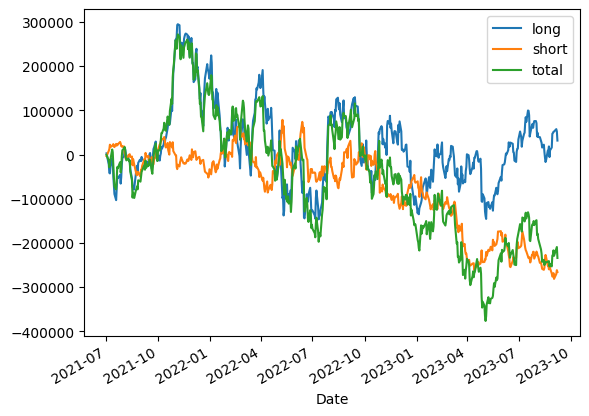

In [24]:
total_y, cum_y = calc_total_portfolio_returns(long_p_y, short_p_y)
cum_y.plot()

Further plotting section TBD.

In [22]:
# d_r = pd.DataFrame(portfolio_value['dollar_daily_returns'])[1:]

# # sort values in descending order
# d_r = d_r.sort_values(by=['dollar_daily_returns'], ascending=False)

# # plot returns descending order ignore index date
# ax = d_r.plot(kind='bar', figsize=(20,10), legend=None, title='Daily Returns')
# ax.set_xticklabels([])
# ax.set_xticks([])
# ax.set_xlabel('');

In [23]:
# # plot the total portfolio_value
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(portfolio_value['total'], label='Portfolio Value')
# ax.set_xlabel('Date')

# ax.set_ylabel('Portfolio Value')
# ax.set_title('Portfolio Value Over Time')
# ax.set_xlim(portfolio_value.index.min(), portfolio_value.index.max())
# ax.yaxis.set_major_formatter('${:,.0f}'.format) # format the y axis to show $1,000,000 instead of $1e6
# plt.show()

In [25]:
# plot pct_returns
# ax = portfolio_value['pct_daily_returns'].plot(figsize=(10, 6))

# ax1 = portfolio_value['cum_returns'].plot(kind='line', figsize=(10, 6))
# ax1.yaxis.set_major_formatter('${:,.0f}'.format) # format the y axis to show $1,000,000 instead of $1e6
# ax1.set_xlim(portfolio_value.index.min(), portfolio_value.index.max())

# ax1.axhline(y=0, color='black', lw=0.5);
# ax1.set_title('Cumulative Portfolio Returns', fontsize=14)

# plt.show()

### MoM Momentum Strategy

In [26]:
MoM_change = calculate_growth(nasdaq_prices, trading_days = 30)[-30:]

In [27]:
highest_mom, lowest_mom = get_highest_lowest(MoM_change, 5)

--------------------
Top 5 performing tickers and their returns:
TTD	: 57.53%
ENPH	: 56.82%
NVDA	: 41.41%
MRVL	: 37.26%
ZS	: 35.62%
--------------------
Bottom 5 performing tickers and their returns:
BKR	: -13.19%
WBD	: -10.37%
DLTR	: -9.27%
VRTX	: -9.05%
XEL	: -6.57%


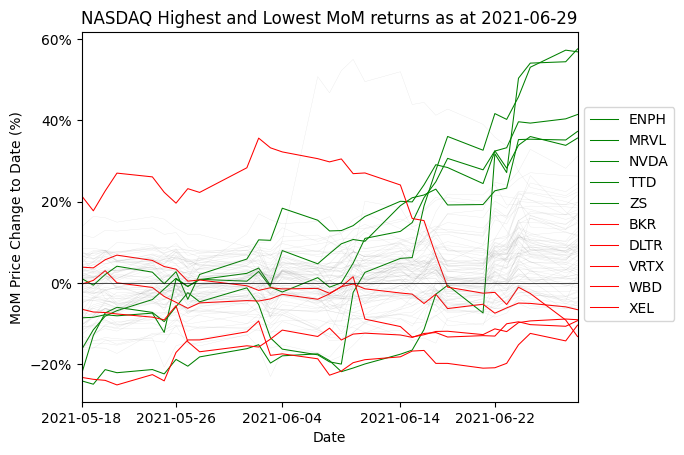

In [28]:
plot_momentum(
    pct_change = MoM_change, 
    highest=highest_mom, 
    lowest=lowest_mom,
    y_label = 'MoM',
    trading_days = 30)

In [29]:
long_p_m = calculate_portfolio_value(
    capital = 10**6,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    portfolio_type = 'long',
    stocks = highest_mom['ticker'].to_list(),
    start_date = '2021-07-01'
)
short_p_m = calculate_portfolio_value(
    capital = 10**6,
    weights = [0.2, 0.2, 0.2, 0.2, 0.2],
    portfolio_type = 'short',
    stocks = lowest_mom['ticker'].to_list(),
    start_date = '2021-07-01'
)


[*********************100%%**********************]  5 of 5 completed
On the start date, you have:
TTD:	2608.24 shares
ENPH:	1092.24 shares
NVDA:	991.08 shares
MRVL:	3521.20 shares
ZS:	935.80 shares


C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

[*********************100%%**********************]  5 of 5 completed
On the start date, you have:
BKR:	9023.57 shares
WBD:	6410.26 shares
DLTR:	2001.80 shares
VRTX:	989.07 shares
XEL:	3160.16 shares


C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s] = (capital * np.array(w)) / stock_prices[s][0] # if there are fractional shares
C:\Users\howes\AppData\Local\Temp\ipykernel_34728\4244747155.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

In [31]:
total_m, cum_m = calc_total_portfolio_returns(long_p_m, short_p_m)

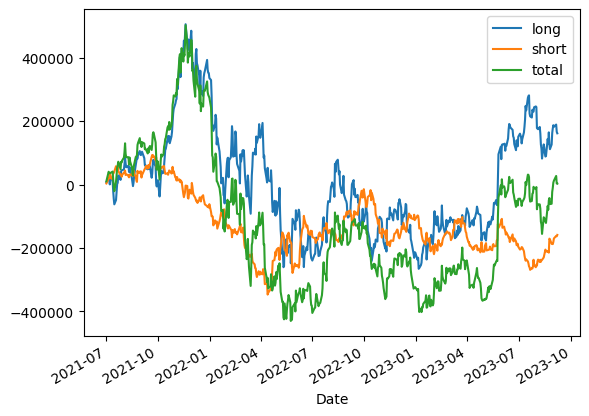

In [32]:
cum_m.plot();